<a href="https://colab.research.google.com/github/KILjungjoon/Term_Project/blob/main/KpopLinearRegresson_pandemic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_excel("/content/drive/MyDrive/A Comparative Study on K-pop and T-pop in the Covid-19 Era/final-term/k_sentimentsumconcat.xlsx")
df

,date,sadness,joy,anger,surprise,fear,disgust,interest,boredom,pain,others,neutral,positive,negative
0,202001,0.316730,0.382746,0.048647,0.008366,0.050426,0.0,0.016688,0.009967,0.069057,0,0,0.399434,0.503192
1,202002,0.333589,0.392784,0.048647,0.008366,0.045107,0.0,0.016688,0.009967,0.080232,0,0,0.409472,0.525908
2,202003,0.320410,0.409045,0.045773,0.006834,0.052387,0.0,0.016688,0.006222,0.077359,0,0,0.425733,0.508984
3,202004,0.273920,0.370746,0.048409,0.006834,0.055473,0.0,0.016688,0.009308,0.078899,0,0,0.387433,0.472844
4,202005,0.243209,0.362038,0.048409,0.006834,0.055473,0.0,0.016688,0.009308,0.075195,0,0,0.378726,0.438430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,202240,0.269805,0.490425,0.010746,0.010320,0.053239,0.0,0.014667,0.035157,0.063761,0,0,0.505092,0.443029
142,202241,0.303404,0.527011,0.014883,0.010320,0.051771,0.0,0.015659,0.035157,0.061823,0,0,0.542671,0.477359
143,202242,0.265224,0.506150,0.009648,0.008042,0.035900,0.0,0.015659,0.035157,0.057215,0,0,0.521809,0.411187
144,202243,0.275189,0.553665,0.021769,0.008042,0.040174,0.0,0.023085,0.035157,0.057215,0,0,0.576750,0.437546


In [6]:
df.columns

Index(['date', 'sadness', 'joy', 'anger', 'surprise', 'fear', 'disgust',
       'interest', 'boredom', 'pain', 'others', 'neutral', 'positive',
       'negative', 'week'],
      dtype='object')

In [8]:
# 새로운 week 컬럼 생성
week=[]
for n in range(1, 147) :    # 1부터 시작하므로 147을 끝번호로 지정해야 한다.
  week.append(n)
df['week']=week
df=df[['week','date', 'sadness', 'joy', 'anger', 'surprise', 'fear', 'disgust',
       'interest', 'boredom', 'pain', 'others', 'neutral', 'positive', 'negative']]    # week컬럼을 첫 컬럼으로 위치 변경

In [24]:
df

,week,date,sadness,joy,anger,surprise,fear,disgust,interest,boredom,pain,others,neutral,positive,negative
0,1,202001,0.316730,0.382746,0.048647,0.008366,0.050426,0.0,0.016688,0.009967,0.069057,0,0,0.399434,0.503192
1,2,202002,0.333589,0.392784,0.048647,0.008366,0.045107,0.0,0.016688,0.009967,0.080232,0,0,0.409472,0.525908
2,3,202003,0.320410,0.409045,0.045773,0.006834,0.052387,0.0,0.016688,0.006222,0.077359,0,0,0.425733,0.508984
3,4,202004,0.273920,0.370746,0.048409,0.006834,0.055473,0.0,0.016688,0.009308,0.078899,0,0,0.387433,0.472844
4,5,202005,0.243209,0.362038,0.048409,0.006834,0.055473,0.0,0.016688,0.009308,0.075195,0,0,0.378726,0.438430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,202240,0.269805,0.490425,0.010746,0.010320,0.053239,0.0,0.014667,0.035157,0.063761,0,0,0.505092,0.443029
142,143,202241,0.303404,0.527011,0.014883,0.010320,0.051771,0.0,0.015659,0.035157,0.061823,0,0,0.542671,0.477359
143,144,202242,0.265224,0.506150,0.009648,0.008042,0.035900,0.0,0.015659,0.035157,0.057215,0,0,0.521809,0.411187
144,145,202243,0.275189,0.553665,0.021769,0.008042,0.040174,0.0,0.023085,0.035157,0.057215,0,0,0.576750,0.437546


## 1.상관관계 분석

In [32]:
df[['week','positive','negative']].corr(method='pearson')

,week,positive,negative
week,1.000000,0.656543,-0.402193
positive,0.656543,1.000000,-0.053205
negative,-0.402193,-0.053205,1.000000


In [34]:
# 상관계수(공분산을 표준화)
print(np.corrcoef(df['week'],df['positive'])[0,1])
print(np.corrcoef(df['week'],df['negative'])[0,1])

0.6565427467344068
-0.4021929123878926


In [36]:
# 상관계수 검정 : p-value가 0.05보다 작으므로 귀무가설을 기각하고 상관계수는 유의미하다.
import scipy.stats as stats
print(stats.pearsonr(df['week'],df['positive']))
print(stats.pearsonr(df['week'],df['negative']))

(0.6565427467344065, 2.3244689446718663e-19)
(-0.4021929123878928, 4.851446770222682e-07)


---
---
## 2.선형회귀

---
* 독립변수(x) : 시간(week)

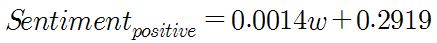



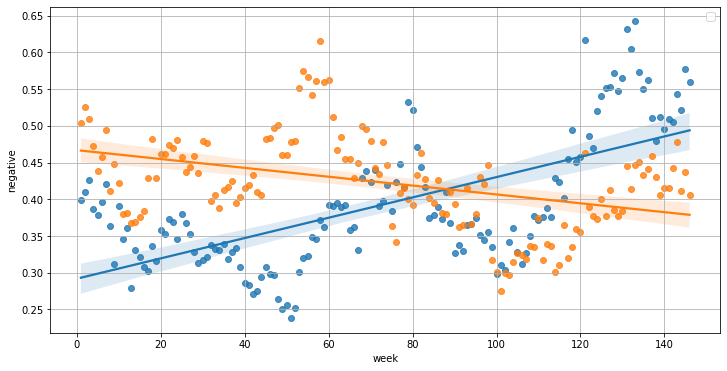

<positive>-------------------------------------
0.0013834865855702815 0.29186188676596875
0.29324537335153905
                            OLS Regression Results                            
Dep. Variable:               positive   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     109.1
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           2.32e-19
Time:                        07:22:36   Log-Likelihood:                 187.51
No. Observations:                 146   AIC:                            -371.0
Df Residuals:                     144   BIC:                            -365.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [20]:
# 그래프 코드 https://lovelydiary.tistory.com/339

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
 
#pyplot과 seaborn으로 회귀그래프 
plt.rcParams["figure.figsize"] = (12, 6)
sns.regplot(x='week', y='positive', data=df)
sns.regplot(x='week', y='negative', data=df)
plt.legend(fontsize=11, loc='best')
# plt.xlim(df['week'].min()-1, df['week'].max()+1)   # x축 범위의 margin 삭제
plt.grid()
plt.show()
print('<positive>-------------------------------------') 
z=np.polyfit(df['week'], df['positive'], 1) # 기울기와 절편 확인
f=np.poly1d(z) # f(x): f함수에 x값을 넣으면 y값을 계산해 줌
print(z[0], z[1])
print(f(1))
print("Positive=")
 
#statsmodel을 통해 회귀식의 회귀계수(기울기, 절편) 확인
print(ols('positive ~ week', data=df).fit().summary())
print()
print('<negative>-------------------------------------') 
z=np.polyfit(df['week'], df['negative'], 1) # 기울기와 절편 확인
f=np.poly1d(z) # f(x): f함수에 x값을 넣으면 y값을 계산해 줌
print(z[0], z[1])
print(f(1))
 
#statsmodel을 통해 회귀식의 회귀계수(기울기, 절편) 확인
print(ols('negative ~ week', data=df).fit().summary())

---
* 독립변수(x) : 확진자 수(confirmed)
## 추후 진행

In [37]:
df=pd.read_csv("/content/drive/MyDrive/A Comparative Study on K-pop and T-pop in the Covid-19 Era/corona_data/Korea-covid-data.csv", encoding="utf-8")
df.loc['']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243166,ZWE,Africa,Zimbabwe,2022-12-12,259356.0,0.0,27.429,5622.0,0.0,0.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
243167,ZWE,Africa,Zimbabwe,2022-12-13,259356.0,0.0,0.000,5622.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
243168,ZWE,Africa,Zimbabwe,2022-12-14,259356.0,0.0,0.000,5622.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
243169,ZWE,Africa,Zimbabwe,2022-12-15,259356.0,0.0,0.000,5622.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


### References
* 선형회귀식과 해석
* https://lovelydiary.tistory.com/348
* https://velog.io/@findingflow/Linear-Regression-Analysis-%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D
* https://blog.minitab.com/ko/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients
